## Task 2- Titanic survival prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.1+ KB


In [ ]:
# converting Sex and Embarked in int data type because it logistic regression requires numerical data.
# we will use further logistic regression because in the dataset Survived is given in 0's and 1's which will be our dependent variable.

In [5]:
df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'Q': 1, 'C': 2}}, inplace=True)


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,0.598086
std,120.810458,0.481622,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.854496
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [65]:
df.shape

(418, 11)

## Checking for null values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# since cabin columns has high no. of null values we will remove this column
 
df=df.drop(columns='Cabin', axis=1)

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [11]:
# age column also consist of the null values but we cannot remove the age column as it is an important column
# we will fill the null places the mean value of the age column

df['Age'].mean()

30.272590361445783

In [12]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [14]:
df['Fare'].mean()

35.627188489208635

In [15]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
# finding the number of people survived and no. of people did not susrvived

In [18]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

## Data Visualisation

<Axes: xlabel='Survived', ylabel='count'>

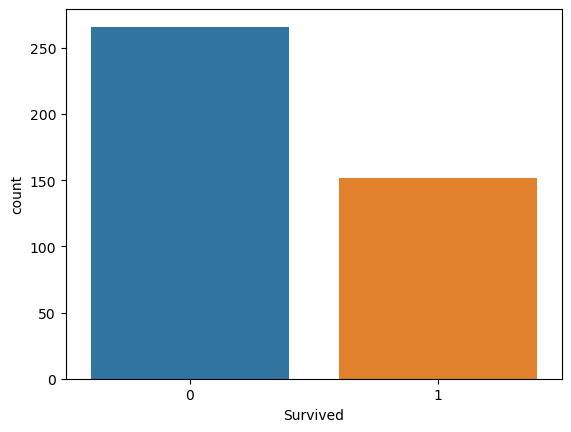

In [19]:
sns.countplot(df, x='Survived')

<Axes: xlabel='Sex', ylabel='count'>

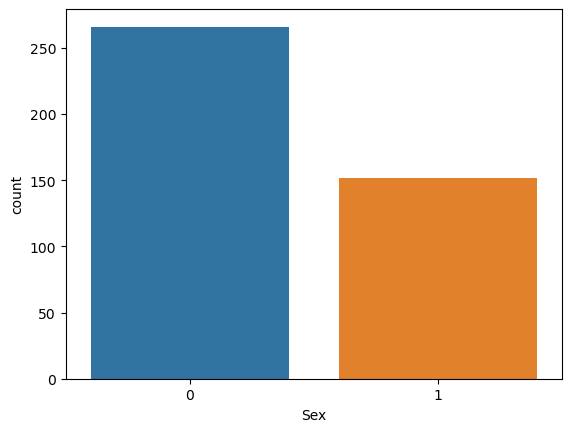

In [20]:
sns.countplot(df, x='Sex')

<Axes: ylabel='count'>

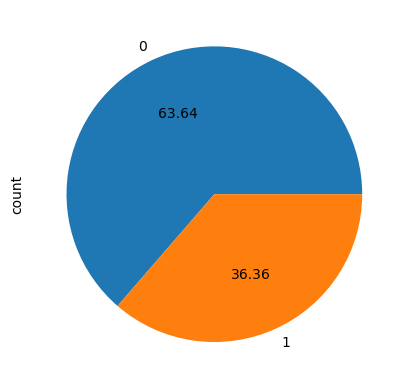

In [21]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')


<Axes: ylabel='count'>

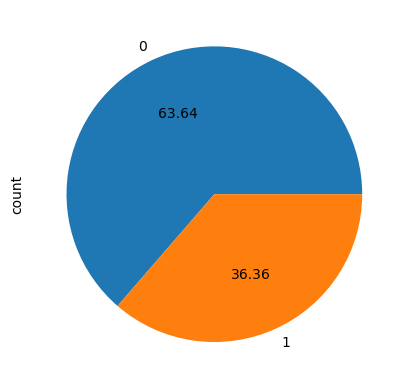

In [22]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Pclass', ylabel='count'>

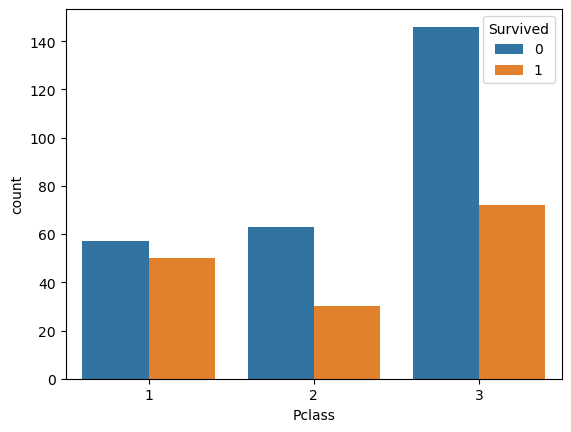

In [23]:
sns.countplot(data=df, x='Pclass', hue='Survived')

## Defining x&y

In [24]:
X=df.drop(columns=['PassengerId','Survived','Name','Ticket'], axis=1)
y=df['Survived']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.1+ KB


In [26]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,1
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,1
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,2
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


In [27]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [28]:
# Splitting the data into training and testing 

In [51]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.4, random_state=40)

In [52]:
print(X.shape,X_train.shape,X_test.shape)

(418, 7) (250, 7) (168, 7)


In [53]:
model=LogisticRegression()


In [54]:
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
X_train_pred=model.predict(X_train)

In [57]:
X_train_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1])

In [58]:
accuracy=accuracy_score(X_train_pred,y_train)

In [59]:
accuracy

1.0

In [60]:
X_test_pred=model.predict(X_test)

In [61]:
X_test_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [62]:
Accuracy=accuracy_score(X_test_pred,y_test)

In [63]:
Accuracy


1.0